# Step Testing

This notebook guides you through the steps necessary to perform a simple step test of a heater/sensor unit on the Temperature Contnrol Lab. 

Download this notebook to your laptop, then run these cells to capture step test data.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from tclab import TCLab, clock, Historian, Plotter

## Executing the Step Test

### Verify an Initial Steady State

**Don't start a step test without first letting the device come to an initial steady state!**

A step test assumes the system is initially at steady state. In the case of the Temperature Control Lab, the initial steady with no power input would be room temperature. It generally takes 10 minutes or more to reach steady state. We'll do a measurement to confirm the initial temperature. Repeat this until you are sure you are at an initial steady state.

In [3]:
lab = TCLab()
print(lab.T1, lab.T1)
lab.close()

TCLab version 0.4.10dev
Arduino Leonardo connected on port /dev/cu.usbmodem143101 at 115200 baud.
TCLab Firmware 2.0.1 Arduino Leonardo/Micro.
23.154 23.154
TCLab disconnected successfully.


### Conduct the Experiment

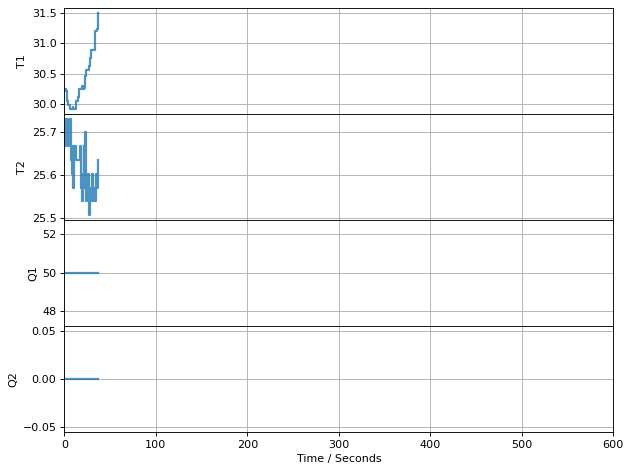

TCLab disconnected successfully.


KeyboardInterrupt: 

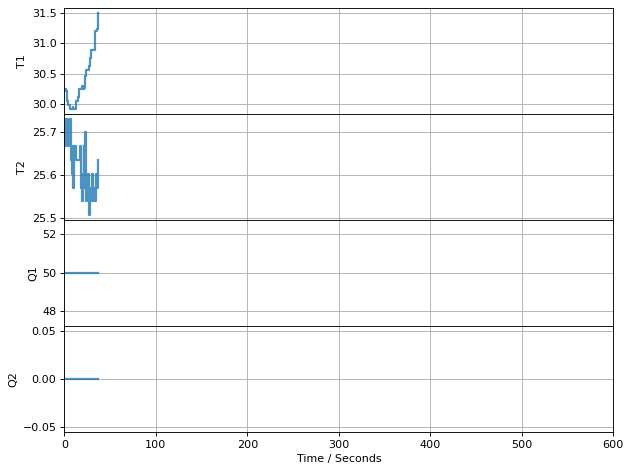

In [16]:
# experimental parameters
P1 = 200
Q1 = 50
tfinal = 600

# perform experiment
with TCLab() as lab:
    lab.P1 = P1
    h = Historian(lab.sources)
    p = Plotter(h, tfinal)
    lab.Q1(Q1)
    for t in clock(tfinal):
        p.update(t)

### Verify the Experimental Data

In [18]:
h.to_csv("data.csv")

### Verify the Data File

<AxesSubplot:xlabel='Time'>

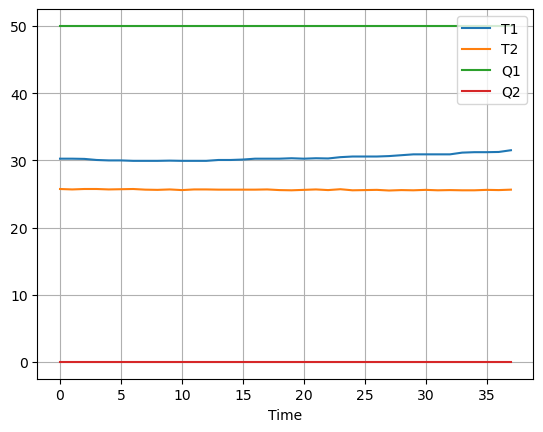

In [26]:
import pandas as pd
df = pd.read_csv('data.csv').set_index('Time')
df.plot(grid=True)

In [27]:
df.head()

,T1,T2,Q1,Q2
Time,,,,
0.0,30.244,25.732,50.0,0.0
1.0,30.244,25.668,50.0,0.0
2.0,30.212,25.732,50.0,0.0
3.0,30.051,25.732,50.0,0.0
4.0,29.986,25.668,50.0,0.0


In [28]:
df.tail()

,T1,T2,Q1,Q2
Time,,,,
33.0,31.146,25.539,50.0,0.0
34.0,31.211,25.539,50.0,0.0
35.0,31.211,25.604,50.0,0.0
36.0,31.243,25.571,50.0,0.0
37.0,31.501,25.636,50.0,0.0
